## Задание 1

### 1) Подготовили рабочую среду в Google Colab, создав новый блокнот. Выполнили импорт требуемых библиотек и модулей для дальнейшей работы.

In [3]:
# импорт модулей
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### 2) Произвели загрузку датасета MNIST, который включает размеченные изображения рукописных цифр.  

In [4]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### 3) Выполнили разделение датасета на обучающую и тестовую выборки в пропорции 60 000:10 000. Для воспроизводимости результатов установили параметр random_state равным (4k – 1)=31, где k=8 соответствует номеру нашей бригады. Отобразили размерности полученных массивов данных.

In [5]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 31)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


### 4) Осуществили предобработку данных для подготовки к обучению сверточной нейронной сети. Нормализовали пиксели изображений в диапазон [0, 1], а метки классов преобразовали в формат one-hot encoding. Продемонстрировали размерности обработанных массивов.

In [6]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (28, 28, 1)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 28, 28, 1)
Shape of transformed X test: (10000, 28, 28, 1)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


### 5) Разработали архитектуру сверточной нейронной сети и провели ее обучение на обучающей выборке, выделив часть данных для валидации. Представили структуру созданной модели.

In [7]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# компилируем и обучаем модель
batch_size = 512
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.7738 - loss: 0.7503 - val_accuracy: 0.9435 - val_loss: 0.1959
Epoch 2/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.9429 - loss: 0.1898 - val_accuracy: 0.9670 - val_loss: 0.1182
Epoch 3/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9603 - loss: 0.1322 - val_accuracy: 0.9743 - val_loss: 0.0887
Epoch 4/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9678 - loss: 0.1057 - val_accuracy: 0.9760 - val_loss: 0.0762
Epoch 5/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9719 - loss: 0.0902 - val_accuracy: 0.9787 - val_loss: 0.0687
Epoch 6/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9749 - loss: 0.0810 - val_accuracy: 0.9800 - val_loss: 0.0622
Epoch 7/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9775 - loss: 0.0719 - val_accuracy: 0.9820 - val_loss: 0.0575
Epoch 8/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9790 - loss: 0.0659 - val_acc

### 6) Протестировали обученную модель на тестовой выборке. Определили значения функции потерь и точности классификации.

In [9]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0396
Loss on test data: 0.03962046653032303
Accuracy on test data: 0.9872999787330627


### 7) Протестировали модель на двух произвольных изображениях из тестовой выборки. Визуализировали изображения и сравнили истинные метки с предсказаниями модели.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
NN output: [[1.02410545e-10 1.21296682e-06 6.38641040e-06 8.52757785e-06
  3.49328509e-12 4.14857287e-10 9.68709627e-17 9.99978900e-01
  6.33653556e-08 4.88464457e-06]]


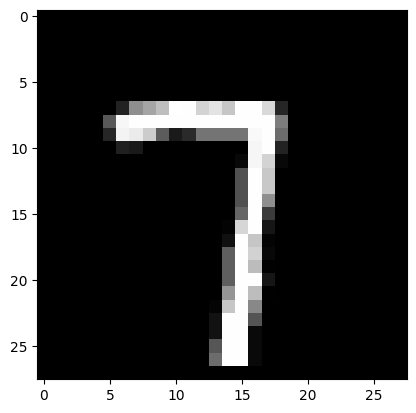

Real mark:  7
NN answer:  7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
NN output: [[2.6005425e-03 3.0321027e-07 2.2106780e-05 1.3148747e-05 8.1389046e-01
  1.5582073e-04 3.5853500e-05 2.7356921e-03 2.7238589e-02 1.5330753e-01]]


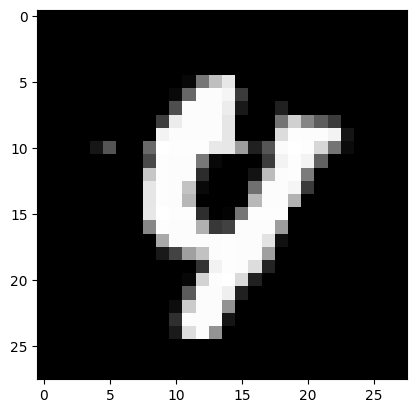

Real mark:  4
NN answer:  4


In [10]:
# вывод двух тестовых изображений и результатов распознавания

for n in [3,26]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))

### 8) Сформировали детальный отчет о качестве классификации на тестовой выборке, включая матрицу ошибок (confusion matrix).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       967
           1       1.00      0.99      0.99      1107
           2       0.98      0.99      0.99       970
           3       0.99      0.98      0.99      1023
           4       1.00      0.99      0.99      1008
           5       0.98      0.99      0.98       866
           6       0.99      0.99      0.99       965
           7       0.98      0.98      0.98      1070
           8       0.98      0.99      0.99       943
           9       0.98      0.98      0.98      1081

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



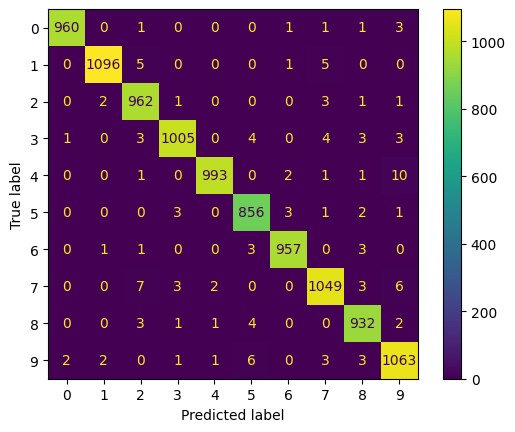

In [11]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()

### 9) Загрузили собственные изображения, подготовленные в рамках лабораторной работы №1. После предобработки передали их на вход обученной модели и получили результаты распознавания.

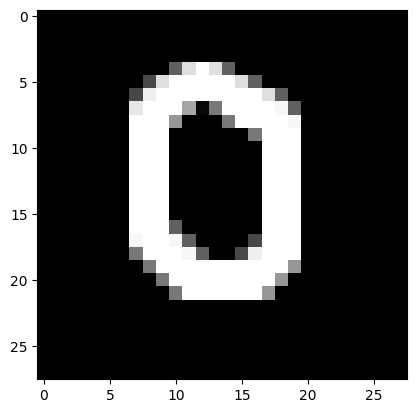

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
I think it's 0


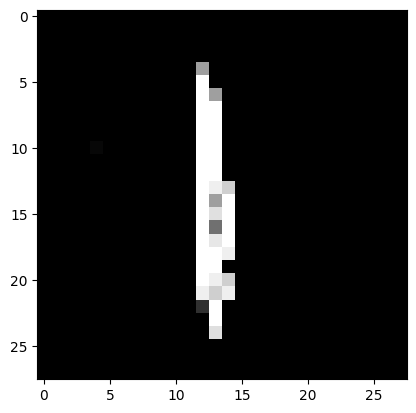

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
I think it's 1


In [13]:
# загрузка собственного изображения
from PIL import Image

for name_image in ['0.png', '1.png']:
  file_data = Image.open(name_image)
  file_data = file_data.convert('L') # перевод в градации серого
  test_img = np.array(file_data)

  # вывод собственного изображения
  plt.imshow(test_img, cmap=plt.get_cmap('gray'))
  plt.show()

  # предобработка
  test_img = test_img / 255
  test_img = np.reshape(test_img, (1,28,28,1))

  # распознавание
  result = model.predict(test_img)
  print('I think it\'s', np.argmax(result))

### 10) Загрузили ранее сохраненную модель из лабораторной работы №1. Изучили ее архитектуру и провели оценку качества на тестовых данных аналогично пункту 6.

In [19]:
model_lr1 = keras.models.load_model("best_model.keras")

model_lr1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,612 (350.05 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [20]:
# развернем каждое изображение 28*28 в вектор 784
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 31)
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X train:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 784)
Shape of transformed X train: (10000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [21]:
# Оценка качества работы модели на тестовых данных
scores = model_lr1.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9440 - loss: 0.1897
Loss on test data: 0.18974457681179047
Accuracy on test data: 0.9440000057220459


### 11) Выполнили сравнительный анализ сверточной нейронной сети и лучшей полносвязной модели из лабораторной работы №1. Сравнение проводилось по трем критериям:
### - число обучаемых параметров модели
### - количество эпох, необходимое для обучения
### - итоговое качество классификации на тестовой выборке
### На основе полученных результатов сформулировали выводы об эффективности применения сверточных нейронных сетей для задач распознавания изображений.  

Таблица1:

| Модель   | Количество настраиваемых параметров | Количество эпох обучения | Качество классификации тестовой выборки |
|----------|-------------------------------------|---------------------------|-----------------------------------------|
| Сверточная | 34 826                              | 15                        | accuracy:0.987     ; loss:0.040                                   |
| Полносвязная | 84 062                              | 50                        | accuracy:0.944     ; loss:0.190                                  |


##### Проведенный сравнительный анализ, результаты которого представлены в таблице 1, наглядно демонстрирует превосходство сверточной нейронной сети над полносвязной архитектурой в задачах классификации изображений. 

**Эффективность по параметрам:** Сверточная сеть содержит в 2.4 раза меньше обучаемых параметров (34 826 против 84 062), что свидетельствует о более эффективном использовании вычислительных ресурсов благодаря механизму разделения весов в сверточных слоях.

**Скорость обучения:** Сверточная модель достигает оптимального качества за 15 эпох, в то время как полносвязная требует 50 эпох. Это указывает на более быструю сходимость алгоритма обучения благодаря индуктивным смещениям, заложенным в архитектуру сверточных сетей.

**Качество классификации:** Сверточная сеть демонстрирует значительно более высокую точность (98.7% против 94.4%) и существенно меньшие потери (0.040 против 0.190). Разница в точности составляет более 4 процентных пунктов, что является существенным улучшением для задачи распознавания рукописных цифр.

**Выводы:** Полученные результаты подтверждают, что использование сверточных слоев позволяет эффективно извлекать иерархические пространственные признаки из изображений, что критически важно для задач компьютерного зрения. Инвариантность к сдвигам и способность выявлять локальные паттерны делают сверточные нейронные сети предпочтительным выбором для работы с изображениями по сравнению с полносвязными архитектурами.

## Задание 2

### В отдельном блокноте повторили этапы 2–8 из задания 1, заменив датасет MNIST на CIFAR-10, который содержит цветные изображения объектов, распределенные по 10 категориям.  
### Особенности выполнения:
### - разделение на обучающую и тестовую выборки выполнено в пропорции 50 000:10 000
### - после разделения данных (между этапами 3 и 4) визуализировали 25 примеров из обучающей выборки с указанием соответствующих классов
### - при тестировании на двух изображениях (этап 7) одно должно быть распознано верно, а второе – с ошибкой   

### 1) Произвели загрузку датасета CIFAR-10, включающего цветные изображения, распределенные по 10 категориям: самолет, автомобиль, птица, кошка, олень, собака, лягушка, лошадь, корабль, грузовик.

In [22]:
# загрузка датасета
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 2) Осуществили разделение датасета на обучающую и тестовую части в соотношении 50 000:10 000. Для обеспечения воспроизводимости установили random_state = 31, что соответствует формуле (4k – 1) при k=8 (номер нашей бригады). Отобразили размерности сформированных массивов.

In [23]:
# создание своего разбиения датасета

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 50000,
                                                    random_state = 31)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (50000, 32, 32, 3)
Shape of y train: (50000, 1)
Shape of X test: (10000, 32, 32, 3)
Shape of y test: (10000, 1)


### Визуализировали 25 примеров из обучающей выборки с указанием их классов.

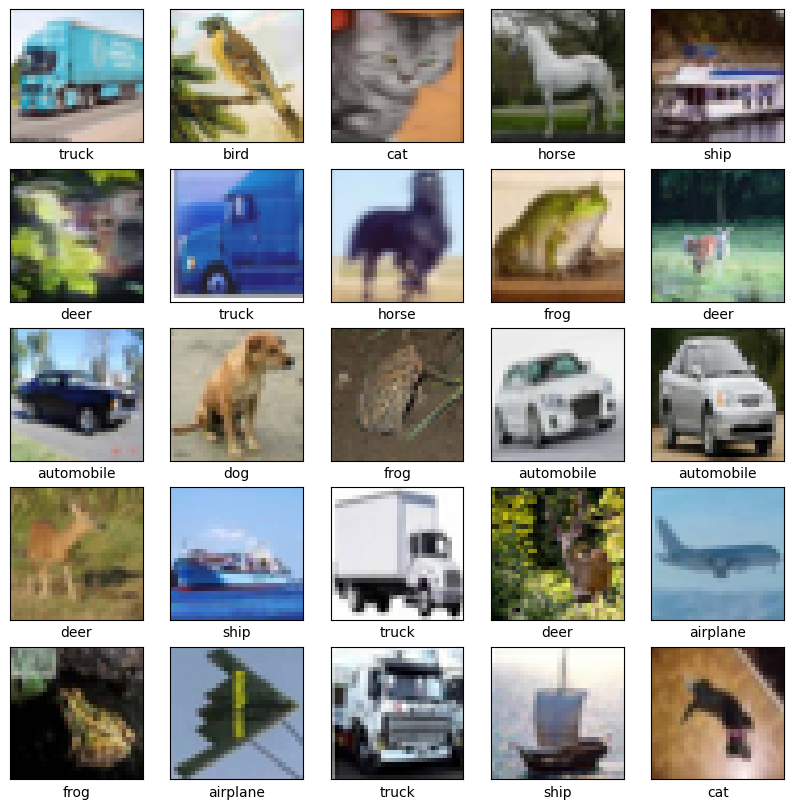

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### 3) Выполнили предобработку данных для обучения сверточной нейронной сети. Нормализовали значения пикселей в диапазон [0, 1] и преобразовали метки классов в формат one-hot encoding. Показали размерности обработанных массивов.

In [25]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (32, 32, 3)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (50000, 32, 32, 3)
Shape of transformed X test: (10000, 32, 32, 3)
Shape of transformed y train: (50000, 10)
Shape of transformed y test: (10000, 10)


### 4) Построили архитектуру сверточной нейронной сети и провели обучение на обучающей выборке с использованием части данных для валидации. Представили детальную структуру модели.

In [26]:
# создаем модель
model = Sequential()

# Блок 1
model.add(layers.Conv2D(32, (3, 3), padding="same",
                        activation="relu", input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 2
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 3
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))


model.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [27]:
# компилируем и обучаем модель
batch_size = 64
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 115ms/step - accuracy: 0.3052 - loss: 1.8713 - val_accuracy: 0.4752 - val_loss: 1.3957
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 114ms/step - accuracy: 0.4705 - loss: 1.4488 - val_accuracy: 0.5730 - val_loss: 1.1992
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 111ms/step - accuracy: 0.5626 - loss: 1.2235 - val_accuracy: 0.6470 - val_loss: 1.0268
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 75s 107ms/step - accuracy: 0.6261 - loss: 1.0727 - val_accuracy: 0.6940 - val_loss: 0.8987
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 75s 106ms/step - accuracy: 0.6678 - loss: 0.9739 - val_accuracy: 0.7042 - val_loss: 0.8850
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 73s 104ms/step - accuracy: 0.6986 - loss: 0.8855 - val_accuracy: 0.7360 - val_loss: 0.7630
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 74s 105ms/step - accuracy: 0.7183 - loss: 0.8263 - val_accuracy: 0.7624 - val_loss: 0.7084
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 77s 110ms/step - accuracy: 0.7344 - loss: 0

### 5) Проанализировали качество обученной модели на тестовой выборке. Определили значения функции потерь и метрики точности классификации.

In [28]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8549 - loss: 0.5139
Loss on test data: 0.5139228701591492
Accuracy on test data: 0.8549000024795532


### 6) Протестировали модель на двух изображениях из тестовой выборки. Визуализировали изображения и сопоставили истинные метки с предсказаниями нейронной сети.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
NN output: [[1.2917297e-03 1.5173923e-03 7.3140259e-03 8.7915343e-01 5.2461558e-04
  1.0724516e-01 9.8486373e-04 1.8565248e-03 6.8461086e-05 4.3758133e-05]]


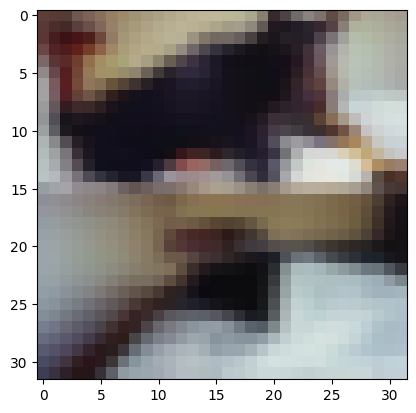

Real mark:  3
NN answer:  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
NN output: [[1.0608504e-06 1.7653504e-08 9.3135744e-01 1.1895873e-03 9.9542603e-06
  6.6781670e-02 6.5458257e-04 5.6261097e-06 5.1841993e-09 1.2788083e-09]]


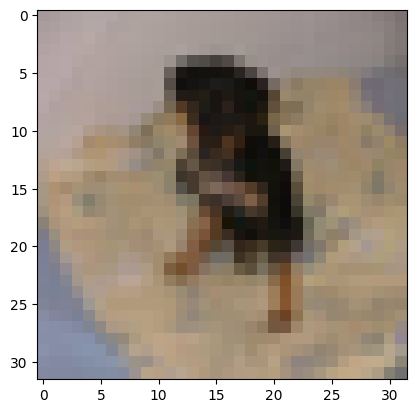

Real mark:  5
NN answer:  2


In [43]:
# вывод двух тестовых изображений и результатов распознавания

for n in [3,10]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(32,32,3), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))

### 7) Сформировали подробный отчет о результатах классификации тестовой выборки и построили матрицу ошибок (confusion matrix).

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

    airplane       0.81      0.91      0.86      1004
  automobile       0.85      0.97      0.91       985
        bird       0.79      0.80      0.80       998
         cat       0.76      0.70      0.73       985
        deer       0.85      0.84      0.85       992
         dog       0.82      0.77      0.79       968
        frog       0.86      0.93      0.89      1010
       horse       0.91      0.86      0.89      1020
        ship       0.97      0.86      0.91      1002
       truck       0.93      0.90      0.91      1036

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



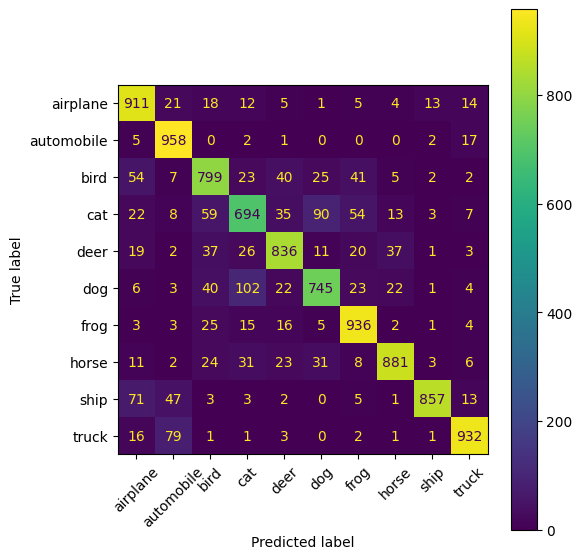

In [30]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels, target_names=class_names))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
disp.plot(ax=ax, xticks_rotation=45)  # поворот подписей по X и приятная палитра
plt.tight_layout()  # чтобы всё влезло
plt.show()

#### Анализ результатов классификации датасета CIFAR-10 показал, что разработанная сверточная нейронная сеть с архитектурой, включающей три блока сверточных слоев с batch normalization и dropout, успешно справилась с задачей классификации цветных изображений.

**Общая производительность:** Достигнутая точность классификации составляет 85.49%, что является хорошим результатом для данного датасета, учитывая его сложность (малый размер изображений 32×32, высокая вариативность объектов, наличие фоновых элементов).

**Анализ по классам:** Модель демонстрирует различную эффективность для разных категорий объектов:
- **Высокая точность (≥90%):** ship (precision 0.97, recall 0.86), truck (precision 0.93, recall 0.90), horse (precision 0.91, recall 0.86) - объекты с четкими геометрическими формами и характерными признаками
- **Средняя точность (80-90%):** automobile (precision 0.85, recall 0.97), airplane (precision 0.81, recall 0.91), deer (precision 0.85, recall 0.84), frog (precision 0.86, recall 0.93), dog (precision 0.82, recall 0.77) - объекты с более сложной структурой
- **Пониженная точность (<80%):** bird (precision 0.79, recall 0.80), cat (precision 0.76, recall 0.70) - объекты с высокой внутриклассовой вариативностью и схожестью между классами

**Особенности классификации:** Наибольшие трудности модель испытывает при классификации кошек (precision 0.76, recall 0.70), что связано с высокой вариативностью этого класса и схожестью с собаками. При этом модель демонстрирует сбалансированные метрики precision и recall для большинства классов, что указывает на отсутствие систематических смещений в предсказаниях. Интересно отметить, что для некоторых классов (automobile, airplane, frog) recall выше precision, что говорит о склонности модели чаще предсказывать эти классы.

**Выводы:** Полученные результаты подтверждают эффективность применения сверточных нейронных сетей с batch normalization и dropout для классификации цветных изображений. Архитектура успешно извлекает пространственные признаки различного уровня абстракции, что позволяет достигать высокого качества классификации даже на сложных наборах данных с ограниченным разрешением изображений.